# Sony Research - Customer Churn Prediction

## Table of Contents
* [Assignment](#Assignment)
* [Data Description](#Data-Description)
* [Question 1](#Question-1)
* [Question 2](#Question-2)
* [Question 3](#Question-3)
* [Question 4](#Question-4)
* [Question 5](#Question-5)

## Assignment
You are provided with a sample dataset of a telecom company’s customers and it's expected to done the following tasks:

**Question 1:**  Perform exploratory analysis and extract insights from the dataset.

**Question 2:** Split the dataset into train/test sets and explain your reasoning.

**Question 3:** Build a predictive model to predict which customers are going to churn and discuss the reason why you choose a particular algorithm.

**Question 4:** Establish metrics to evaluate model performance.

**Question 5:** Discuss the potential issues with deploying the model into production.

## Data Description

**State:** The state where a customer comes from

**Account length:**	Number of days a customer has been using services

**Area code:** The area where a customer comes from

**Phone number:** The phone number of a customer

**International:** The status of customer international plan

**Voicemail plan:** The status of customer voicemail plan

**Number vmail msgs:** Number of voicemail message sent by a customer

**Total day minutes:** Total call minutes spent by a customer during day time

**Total day calls:** Total number of calls made by a customer during day time

**Total day charge:** Total amount charged to a customer during day time

**Total eve minutes:** Total call minutes spent by a customer during evening time

**Total eve calls:** Total number of calls made by a customer during evening time

**Total eve charge:** Total amount charged to a customer during evening time

**Total night minutes:** Total call minutes spent by a customer during night time

**Total night calls:** Total number of calls made by a customer during night time

**Total night charge:** Total amount charged to a customer during night time

**Total intl minutes:** Total international call minutes spent by a customer

**Total intl calls:** Total number of international calls made by a customer

**Total intl charge:** Total international call amount charged to a customer

**Customer service calls:** Total number of customer service calls made by a customer

**Churn:** Whether a customer is churned or not

## Question 1
Perform exploratory analysis and extract insights from the dataset.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('Data_Science_Challenge.csv')
data.head(3)

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False


In [3]:
data.shape

(3333, 21)

In [4]:
data.isnull().sum()

state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

In [6]:
print('Number of unique phone number:' , data['phone number'].nunique())
print('Number of unique area code:' , data['area code'].nunique())
print('Number of unique state:' , data['state'].nunique())

Number of unique phone number: 3333
Number of unique area code: 3
Number of unique state: 51


Other features such as area code (as long as their distinct value amount does not explode the number of variables in the dataset) can be processed with one-hot encoding to create insight for machine learning models. This effort is necessary because if we would remain them as it is, it could misguide the ML model such as having an implicit ordinal relationship between categories.



We will prefer to leave state values out of the dataset in order to not have issues with high dimensionality. We can start to process other categorical features.

In [7]:
area_code_dummies = pd.get_dummies(data['area code'])

# The add_prefix() method inserts the specified value in front of the column label.
area_code_dummies = area_code_dummies.add_prefix('area_code_')

area_code_dummies

,area_code_408,area_code_415,area_code_510
0,0,1,0
1,0,1,0
2,0,1,0
3,1,0,0
4,0,1,0
...,...,...,...
3328,0,1,0
3329,0,1,0
3330,0,0,1
3331,0,0,1


In [8]:
data['voice mail plan'].loc[data['voice mail plan'] == 'no'] = 0

data['voice mail plan'].loc[data['voice mail plan'] == 'yes'] = 1

data['voice mail plan'] = data['voice mail plan'].astype('int64')

data['voice mail plan']

/var/folders/9q/jfjy60yj2tb9g_kpwyt_g0b80000gn/T/ipykernel_2292/3148800439.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['voice mail plan'].loc[data['voice mail plan'] == 'no'] = 0
/var/folders/9q/jfjy60yj2tb9g_kpwyt_g0b80000gn/T/ipykernel_2292/3148800439.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['voice mail plan'].loc[data['voice mail plan'] == 'yes'] = 1


0       1
1       1
2       0
3       0
4       0
       ..
3328    1
3329    0
3330    0
3331    0
3332    1
Name: voice mail plan, Length: 3333, dtype: int64

In [9]:
data['international plan'].loc[data['international plan'] == 'no'] = 0

data['international plan'].loc[data['international plan'] == 'yes'] = 1

data['international plan'] = data['international plan'].astype('int64')

data['international plan']

/var/folders/9q/jfjy60yj2tb9g_kpwyt_g0b80000gn/T/ipykernel_2292/145883522.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['international plan'].loc[data['international plan'] == 'no'] = 0
/var/folders/9q/jfjy60yj2tb9g_kpwyt_g0b80000gn/T/ipykernel_2292/145883522.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['international plan'].loc[data['international plan'] == 'yes'] = 1


0       0
1       0
2       0
3       1
4       1
       ..
3328    0
3329    0
3330    0
3331    1
3332    0
Name: international plan, Length: 3333, dtype: int64

In [10]:
data_final = data.drop(columns = ['phone number', 'state', 'area code'])

#Pandas concat() method is used to concatenate pandas objects such as DataFrames and Series
data_final = pd.concat([data_final, area_code_dummies], axis = 1)

data_final

,account length,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,...,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn,area_code_408,area_code_415,area_code_510
0,128,0,1,25,265.1,110,45.07,197.4,99,16.78,...,91,11.01,10.0,3,2.70,1,False,0,1,0
1,107,0,1,26,161.6,123,27.47,195.5,103,16.62,...,103,11.45,13.7,3,3.70,1,False,0,1,0
2,137,0,0,0,243.4,114,41.38,121.2,110,10.30,...,104,7.32,12.2,5,3.29,0,False,0,1,0
3,84,1,0,0,299.4,71,50.90,61.9,88,5.26,...,89,8.86,6.6,7,1.78,2,False,1,0,0
4,75,1,0,0,166.7,113,28.34,148.3,122,12.61,...,121,8.41,10.1,3,2.73,3,False,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,192,0,1,36,156.2,77,26.55,215.5,126,18.32,...,83,12.56,9.9,6,2.67,2,False,0,1,0
3329,68,0,0,0,231.1,57,39.29,153.4,55,13.04,...,123,8.61,9.6,4,2.59,3,False,0,1,0
3330,28,0,0,0,180.8,109,30.74,288.8,58,24.55,...,91,8.64,14.1,6,3.81,2,False,0,0,1
3331,184,1,0,0,213.8,105,36.35,159.6,84,13.57,...,137,6.26,5.0,10,1.35,2,False,0,0,1


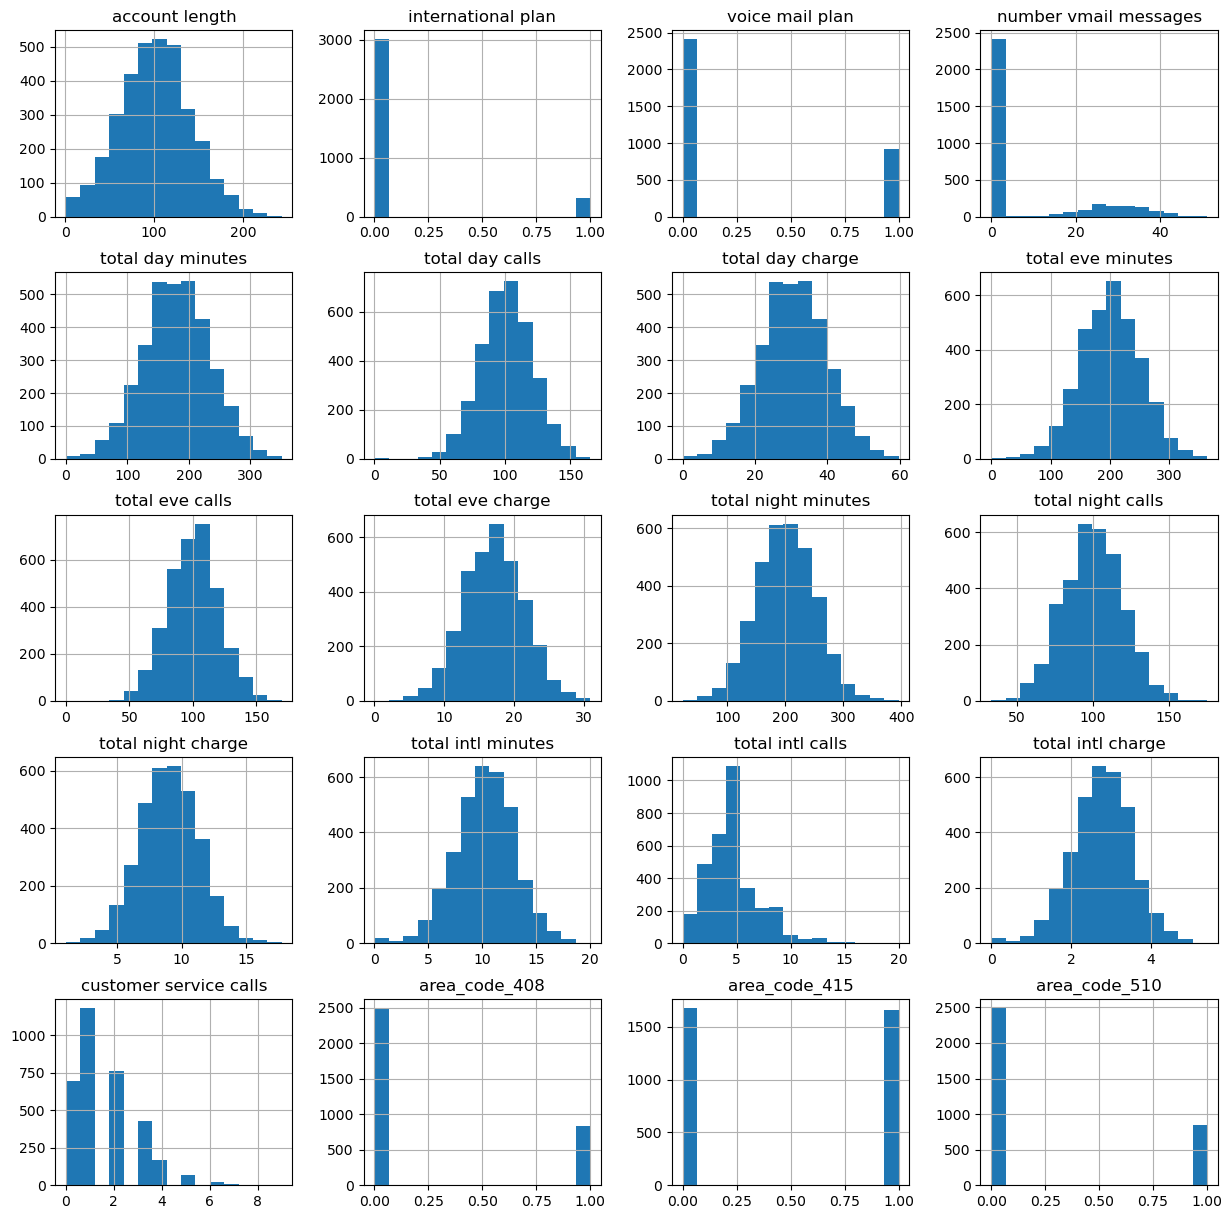

In [11]:
data_final.hist(figsize = (15, 15), bins = 15)
plt.show()

In [12]:
data_final.groupby(['churn'])['churn'].count()

churn
False    2850
True      483
Name: churn, dtype: int64

The distributions tell us:

* Most customers don't use voice mail service and international plans.

* Half of the customers live in area code 415.

* The company earns more by total day calls (check total day charge).

* We have an imbalanced dataset which could be tricky when choosing evaluation metrics.

<Axes: >

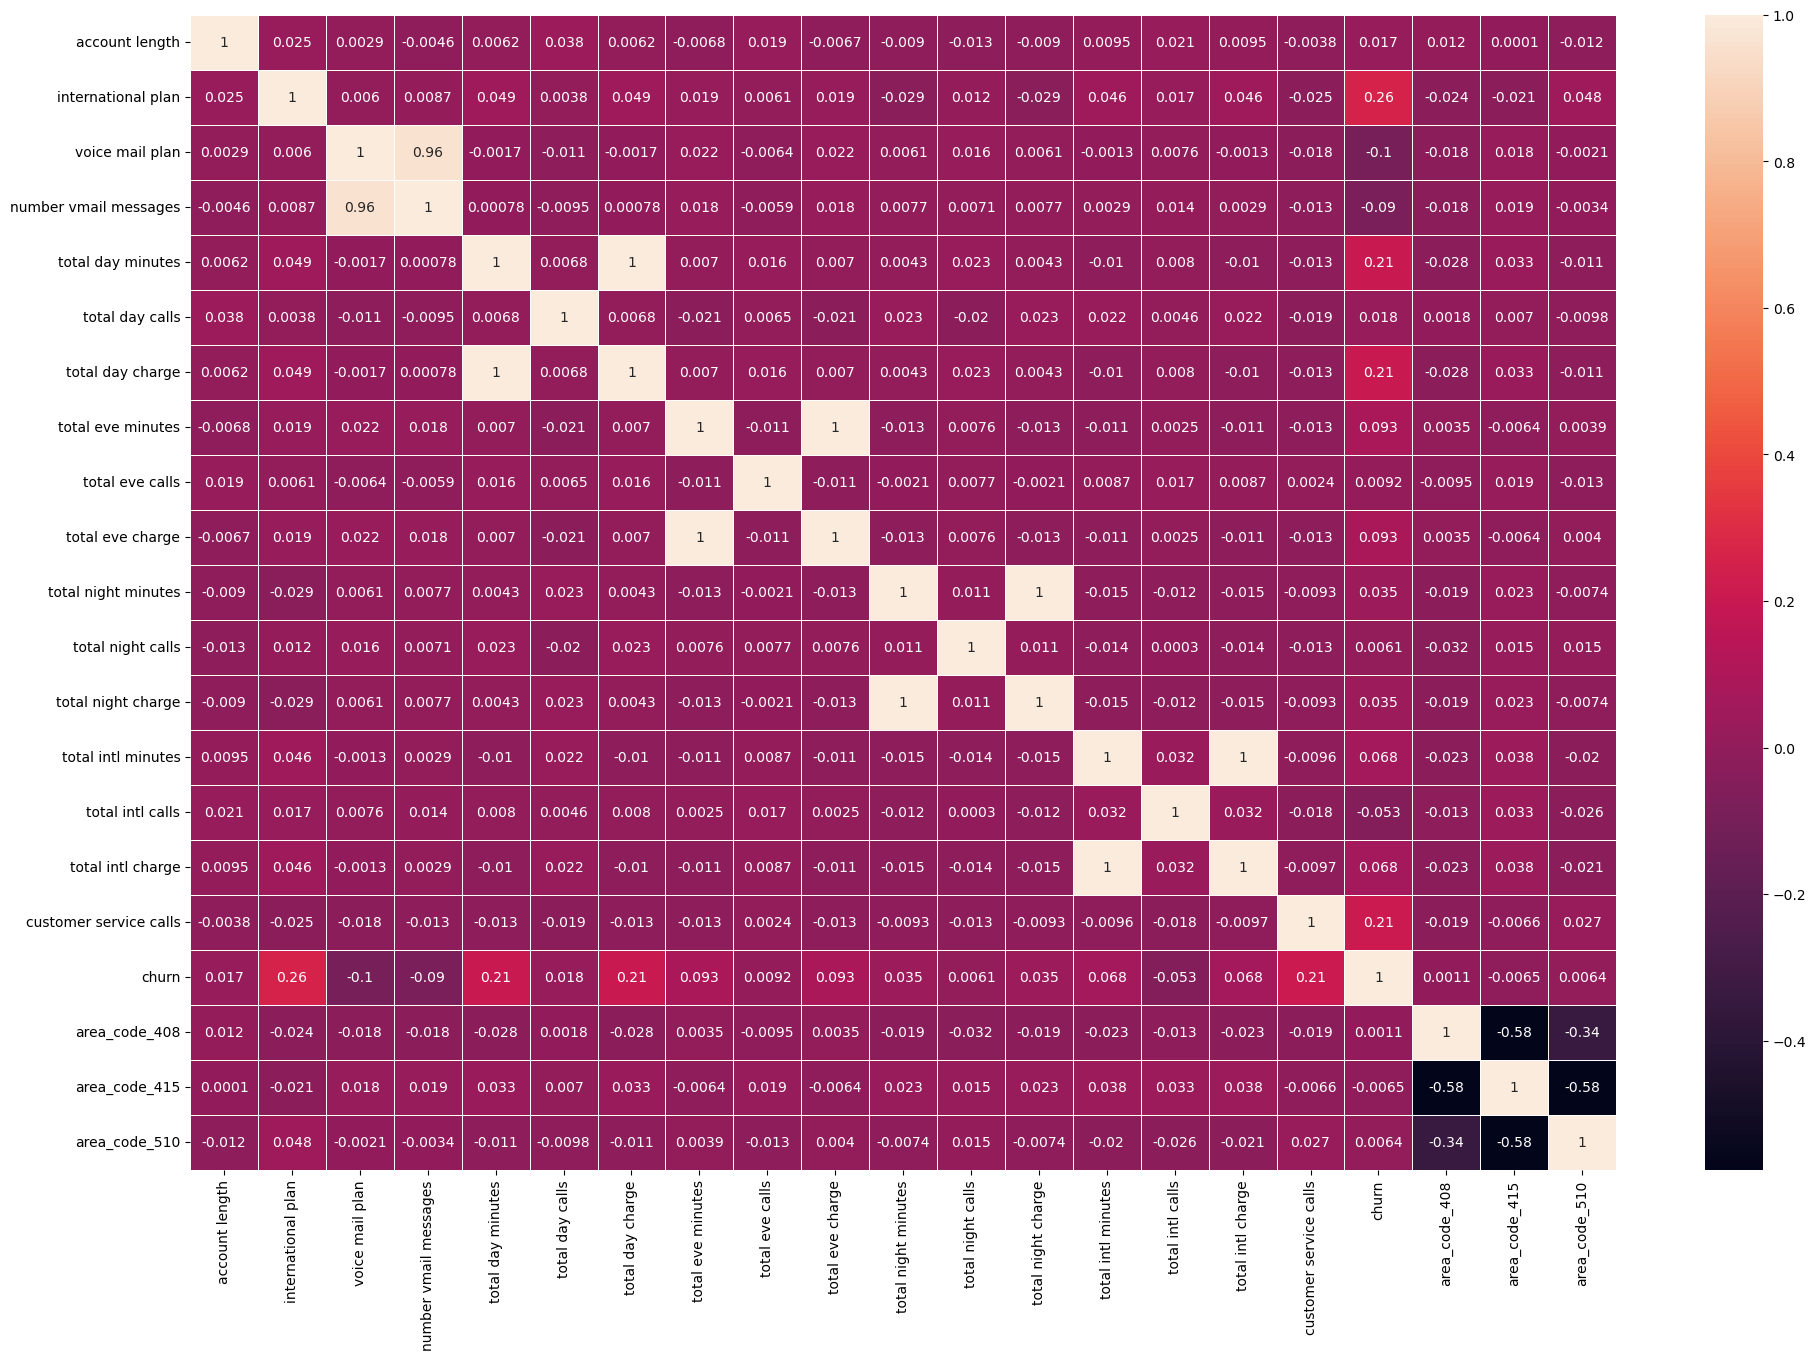

In [13]:
f, ax = plt.subplots(figsize=(23,15))
sns.heatmap(data_final.corr(), annot = True, linewidths = 0.5)

From the correlation matrix, we observe the following things:

There is a positive correlation between:

* total day charge, total day minutes, and churn
* total eve minutes and total eve charge
* total night minutes and total night charge
* total intl minutes and total intl charge
* total customer service calls and churn
* number vmail messages and voice mail
* international plan and churn

There is a negative correlation between:

* churn and voice mail plan
* churn and number vmail messages
* churn and total intl calls


Most of the relations are as expected. Still, there could be some interesting points such as the positive correlation between churn and international plan. It could be caused by the poor quality of international plans or calls. Let's check the individual effect of features on churn rate through a random forest classifier.

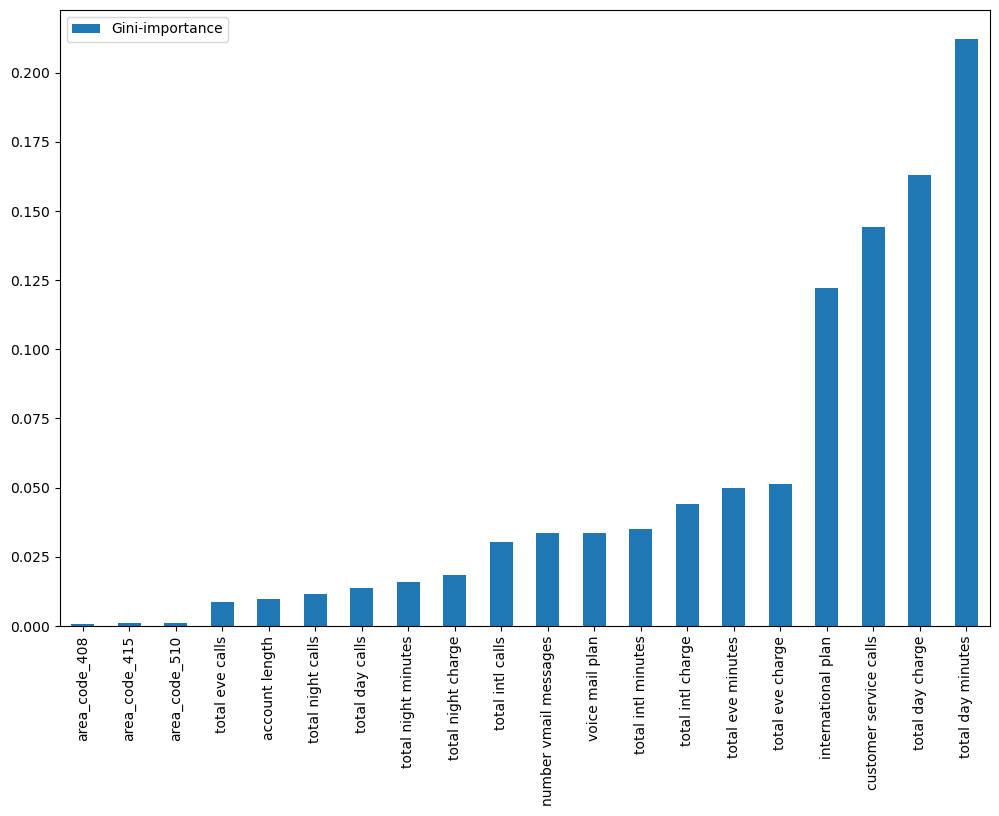

In [14]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

label_encoder = preprocessing.LabelEncoder()

# Apply label encoder for churn since its values are also categories.
y = label_encoder.fit_transform(data_final['churn'])

X = data_final.drop(columns = ['churn'])

# Train-test split.
X = StandardScaler().fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# Selected features are selected in multicollinearity check part
features_names = [f"feature {i}" for i in range((X.shape[1]))]

random_forest = RandomForestClassifier(max_depth = 5)
random_forest.fit(X_train, y_train)

features = {}  # A dict to hold feature_name : feture_importance

# The zip() function returns a zip object, which is an iterator of tuples where the first item in each 
# passed iterator is paired together, and then the second item in each passed iterator is paired together, etc.
for feature,importance in zip(data_final.drop(columns = ['churn']).columns, random_forest.feature_importances_):
    features[feature] = importance   # Add the name/value pair
    
#Feature importance refers to techniques that assign a score to input features based on 
# how useful they are at predicting a target variable.    
    
importances = pd.DataFrame.from_dict(features, orient = 'index').rename(columns = {0 : 'Gini-importance'})
importances.sort_values(by = 'Gini-importance').plot(kind = 'bar', rot = 90, figsize = (12,8))

plt.show()

Gini-importance shows us which features would be most helpful if we build a tree-based model with given features. According to the analysis above, the most important three churn features are:
* total day charge
* total day minutes
* customer service calls.

## Question 2
Split the dataset into train/test sets and explain your reasoning.

In [15]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

label_encoder = preprocessing.LabelEncoder()

# Apply label encoder for churn since its values are also categories.
y = label_encoder.fit_transform(data_final['churn'])

X = data_final.drop(columns = ['churn'])

# Train-test split.
X = StandardScaler().fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify = y)


## Question 3
Build a predictive model to predict which customers are going to churn and discuss the reason why you choose a particular algorithm.

Since this is a classification problem by definition, we will apply a bunch of classifiers and decide to pick one to use in production based on the performance. Hyperparameters of the given classifiers are chosen as trial-error without applying an advanced hyperparameter tuning mechanism.

In [16]:
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

In [17]:
names = [
    "Nearest Neighbors",
    "Linear SVM",
    "RBF SVM",
    "Gaussian Process",
    "Decision Tree",
    "Random Forest",
    "Neural Net",
    "AdaBoost",
    "Naive Bayes",
    "QDA",
    "XGBoost",
    "LightGBM"
]

classifiers = [

    KNeighborsClassifier(3), 
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    GaussianProcessClassifier(1.0 * RBF(1.0), random_state=42),
    DecisionTreeClassifier(max_depth=5, random_state=42),
    RandomForestClassifier(max_depth=5, random_state=42),
    MLPClassifier(alpha=1, max_iter=1000, random_state=42),
    AdaBoostClassifier(random_state=42),
    GaussianNB(),
    QuadraticDiscriminantAnalysis(),
    XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', seed=0),
    LGBMClassifier(random_state=42)]

/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


## Question 4
Establish metrics to evaluate model performance.

This is a classification task, and the most commonly used metric is accuracy. But, we have an imbalanced dataset, which means we need to be careful about our evaluations. Let's say you have a very skewed dataset with a distribution of 99% of labels 1 and 1% of them 0. Then, if your model always predicts 1, it will have 99% accuracy but still not a good model. F1 score balances the precision and recall so we can have a good metric even for imbalanced datasets. Hence, we will use accuracy and F1 scores while comparing the performance of different algorithms.

In [18]:
from sklearn.metrics import f1_score

## Classical Machine Learning Models

In [19]:
for name, classification in zip(names,classifiers):
    classification.fit(X_train,y_train)
    accurate_score = classification.score(X_test, y_test)
    y_pred = classification.predict(X_test)
    f_score = f1_score(y_test, y_pred, average = 'macro')
    print('Accuracy:', "{:.2f}".format(accurate_score), "F1 Score",
          "{:.2f}".format(f_score), 'Model:', name)

/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

Accuracy: 0.87 F1 Score 0.67 Model: Nearest Neighbors
Accuracy: 0.85 F1 Score 0.46 Model: Linear SVM
Accuracy: 0.85 F1 Score 0.46 Model: RBF SVM
Accuracy: 0.90 F1 Score 0.76 Model: Gaussian Process
Accuracy: 0.92 F1 Score 0.82 Model: Decision Tree
Accuracy: 0.90 F1 Score 0.70 Model: Random Forest
Accuracy: 0.92 F1 Score 0.81 Model: Neural Net
Accuracy: 0.87 F1 Score 0.69 Model: AdaBoost
Accuracy: 0.85 F1 Score 0.70 Model: Naive Bayes
Accuracy: 0.84 F1 Score 0.71 Model: QDA


/opt/anaconda3/lib/python3.9/site-packages/sklearn/discriminant_analysis.py:878: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


Accuracy: 0.95 F1 Score 0.88 Model: XGBoost
Accuracy: 0.94 F1 Score 0.87 Model: LightGBM


We obtained good accuracy and satisfying F1 score on tree-based methods. The best performed model is XGBoost with 0.95 accuracy and 0.88 F1-score. Let's visualize the Decision Tree and see how tree-based algorithms decide for our particular problem.

Accuracy: 0.94 F1 Score 0.87


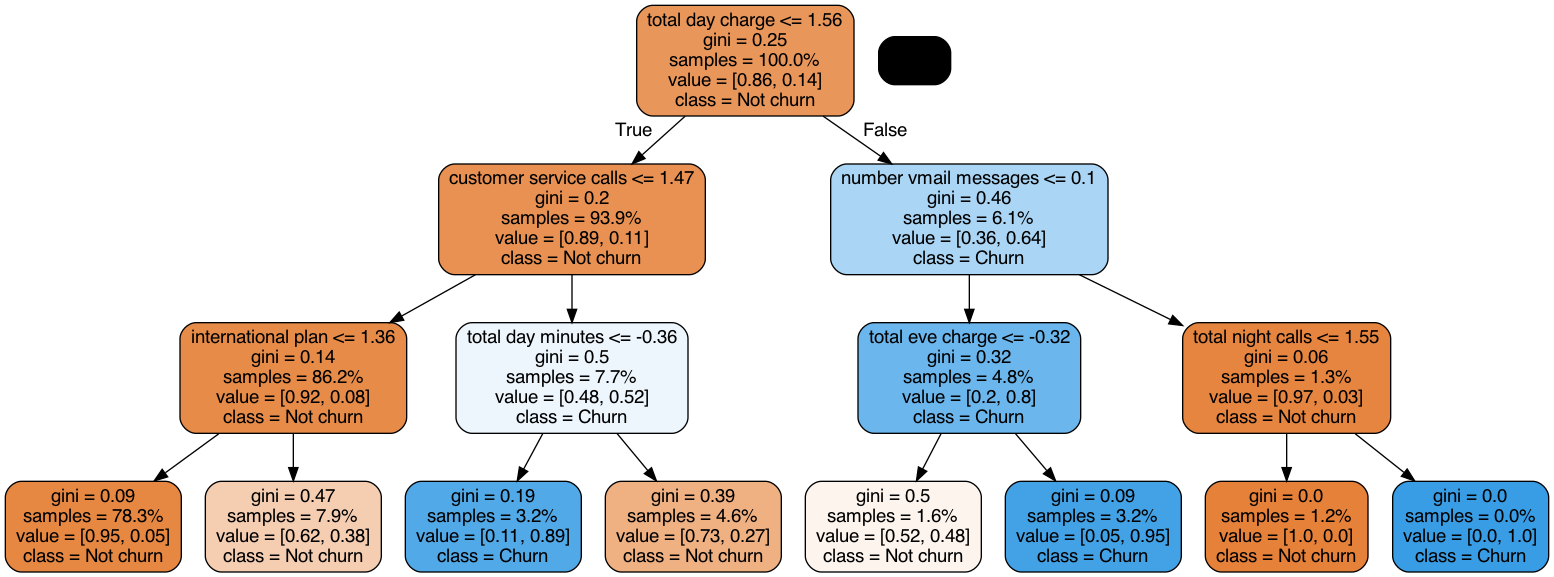

In [20]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from IPython.display import SVG,display,Image
import pydotplus

# Function attributes
# maximum_depth  - depth of tree
# criterion_type - ["gini" or "entropy"]
# split_type     - ["best" or "random"]

def plot_decision_tree(maximum_depth, criterion_type, split_type):
    clf = DecisionTreeClassifier(max_depth = 3)
    clf.fit(X_train, y_train)
    score = clf.score(X_test, y_test)
    print('Accuracy:', "{:.2f}".format(accurate_score), "F1 Score",
          "{:.2f}".format(f_score))
    
    #plot
    graph = tree.export_graphviz(clf, out_file = None, rounded = True,proportion = True,
                                feature_names = data_final.drop(columns = ['churn']).columns.to_list(),
                                precision  = 2, class_names=["Not churn","Churn"], filled = True,)
    
    
    pydot_graph = pydotplus.graph_from_dot_data(graph)
    pydot_graph.set_size('10', '10')
    plt = Image(pydot_graph.create_png())
    display(plt)
    
    
plot_decision_tree(3, 'gini', 'best')

This visualization shows us how the decision tree grows via splitting based on feature values. For example, left-hand side of the tree visualize customers who do not use international plan churns less than who have internal plan. Another example from level two of the tree is customers who call customers service less than 1.47 don't churn while others have higher probability to churn.

## Deep Learning Model
What would be the performance of an Artificial Neural Network (ANN) for the given problem (without spending hours on hyperparameter optimization - just experimenting)?

In [21]:
# Sequential model to initialise our ann and dense module to build the layers.
from keras.models import Sequential
from keras.layers import Dense

# To have reproducible results
import tensorflow
tensorflow.random.set_seed(42)

2023-04-07 12:37:23.780434: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [22]:
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu',
                    input_dim = X.shape[1]))

# Adding the second hidden layer
classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu'))

# Adding the output layer
classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

In [23]:
# Comiling the ANN | means appliyng SGD on the whole ANN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Fitting the ANN to the training set
classifier.fit(X_train, y_train, batch_size = 10, epochs = 100, verbose = 0)

loss, accuracy = classifier.evaluate(X_train, y_train, batch_size = 10)

print('Train accuracy:', accuracy)

# Predicting the test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

print('*'*20)
loss, accuracy = classifier.evaluate(X_test, y_test,
                            batch_size=10)

print('Test accuracy:', accuracy)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
print(cm)

f1_score = f1_score(y_test, y_pred)
print('Test F1-score:', f1_score)

267/267 [==============================] - 0s 857us/step - loss: 0.2916 - accuracy: 0.8845
Train accuracy: 0.8844711184501648
21/21 [==============================] - 0s 747us/step
********************
67/67 [==============================] - 0s 1ms/step - loss: 0.3328 - accuracy: 0.8636
Test accuracy: 0.8635681867599487
[[555  15]
 [ 76  21]]
Test F1-score: 0.31578947368421056


The performance of ANN couldn't beat the result of tree-based algorithms. In this case, we can continue with XGBoost as the algorithm will be in production due to it has combination of high accuracy and F1 score.

## Question 5
Discuss the potential issues with deploying the model into production.

After the deployment of our ML model to production, we need to continue to monitor its performance since it could degrade over time due to internal or external reasons. It is recommended to update our models periodically, such as training with recent data to avoid common problems. There are two significant problems with the MLOps cycle:

* **Data drift:** Data drift is the situation where the model’s input distribution changes. It could be caused by broken data ingestion or serving pipeline, or a change in the nature of your problem. We can resolve this issue by fixing the broken data engineering pipelines where applicable or by training our model with more data including more recent data points if there is no deterioration in the data quality.

* **Concept drift:** Concept drift is the situation when the functional relationship between the model inputs and outputs changes. The context has changed, but the model doesn’t know about the change. Its learned patterns do not hold anymore. Hence, we need to learn a new model and even use another algorithm if our particular algorithm's performance is not good enough to use in production.